# Actividad 3 del curso Matemáticas para la inteligencia artifical

En este notebook se solucionarán los problemas planteados para la Actividad 3 del curso
- Autor: Carlos Esteban Posada
- Contacto: crls.esteban@hotmail.com

In [1]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd

## 1. Actividades relacionadas con la función de densidad de una variable aleatoria binomial

### a) Prográmese la función de densidad asociada a una variable aleatoria binomial X~B(n,p).
La función debe admitir como parámetros de entrada: _n, p y k_

debe devolver como salida: _P(X=k)_

NOTA: salvo operaciones elementales no se permite el uso de ninguna función preprogramada para realizar cálculos

In [3]:
def factorial(n):
    if n == 1 or n == 0:
        return 1
    else:
        return n*factorial(n-1)
    
def combinatoria(n, k):
    # Esta función recibe n y k y retorna el número 
    # de combinaciones de n elementos tomados de k en k
    comb = factorial(n)/(factorial(k)*factorial(n-k))
    return comb

def binomial_density(n, k, p):
    combinatorio = combinatoria(n, k)
    return combinatorio * (p**k) * (1-p)**(n-k)

In [4]:
factorial(532)

7987995054842935028642353664572278438788888837593921558240855246124715936267097312705088824892240691028098858242189296268626939231582553055186524558524036791076601027070151329491250423762390850044506144065994280437638492191843546073679466422719457002439944787329098180861610605973626479125821002147766678402072769739374915994126775480428352935818510102061397498822457198856283049323110281743048584826598147530068390406447530960743429914849503843111449261536385722222479185235390380381937267971952854656147725672528497443254178593223869282810867176612131449205149723542221183337604033040823799717544810988998402539337932666117431103099043796353569989614122583561621798136258283502292809129517675201156381041535896256211618576775261932934170932692661180776656432783750354255874049163115838319347964898556336714226887844763671131838547457153722873673859414739329327294674253454212891842830262112010553224204991940647338434058310791462042883695998416477335313598281695845508537299407453968306046385015938

### b) Utilícese la función anterior para programar la función de distribución de la binomial
Es decir una función que admita las mismas entradas y devuelva como salida P(X<=k)

In [3]:
def binomial_cumulative(n, k, p):
    # Esta función retorna la función de distribución de una binomial
    # con parámetros n, p y k. 
    # retorna la P(X<=k)
    suma = 0
    for i in range(k+1):
        suma += binomial_density(n, i, p)
    return suma

In [12]:
binomial_density(6, 3, 0.5)

0.3125

### ¡Exploremos un poco estas probabilidades! [opcional]

A continuación una visualización donde se puede observar:
* Función de distribución (la acumulada)
* Función de densidad
para una variable aleatoria B(n, p) cuando cambiamos la n y la p. 
Se verá en el eje x el valor de k que podremos buscar (número de éxitos) y en el eje y el valor de la probabilidad correspondiente a ese k, p y n dados

In [10]:
def distribucion_y_densidad_binomial(n, p):
    fig, ax = plt.subplots(1, 1)
    ax.set_xlim((0, n))
    ax2 = ax.twinx()
#     ax.set_ylim((0, 1))

    K = [k for k in range(n)]
    probabilidades = [binomial_density(n, k, p) for k in K]
    acumulada = [binomial_cumulative(n, k, p) for k in K]

    
    ax.plot(K, probabilidades, label="Densidad", color="g")
    ax.set_ylabel('probabilidad')
    ax.set_xlabel('k - número de éxitos')
    ax.legend(loc=2)
    
    
    ax2.plot(K, acumulada, label="Distribución/acumulada")
    ax2.set_ylabel("probabilidad acumulada")
    ax2.legend(loc=1)
    plt.title("Función de distribución y función de Densidad")
    plt.xlabel("k - número de éxitos")
    
    
    plt.show()

In [11]:
interactive_plot = interactive(distribucion_y_densidad_binomial,
                               n=widgets.IntSlider(min=1, max=50, step=1, value=25),
#                                k=widgets.IntSlider(min=0, max=30, step=1, value=0),
                               p=widgets.FloatSlider(min=0, max=1, step=0.05, value=0.5)
                              )
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(IntSlider(value=25, description='n', max=50, min=1), FloatSlider(value=0.5, description=…

## 2. Cálculese la probabilidad de cada uno de los siguientes casos, utilizando en caso de ser posible, los programas realizados en los ejercicios anteriores

In [6]:
def probabilidad_binomial(n, k, p, operando="="):
    # Esta función retorna la probabilidad de una binomial
    # en alguno de los siguientes casos dependiendo del operando:
    # "=": P(X=k)
    # "<=": P(X<=k)
    # "<": P(X<k)
    # ">=": p(X>=k) = 1-P(X<k)
    # ">": p(X>k) = 1-P(X<=k)
    
    dict_operaciones = {
        '=':  lambda: binomial_density(n, k, p),
        '<=': lambda: binomial_cumulative(n, k, p),
        '<':  lambda: binomial_cumulative(n, k-1, p),
        '>=': lambda: 1 - binomial_cumulative(n, k-1, p),
        '>':  lambda: 1 - binomial_cumulative(n, k, p)
    }
    return dict_operaciones.get(operando)()

### a) la probabilidad de que ocurra un determinado suceso en un día es de 20%. 

¿Cuál es la probabilidad de que el suceso ocurra más de 3 veces en un lapso de 10 días?

In [7]:
# parámetros de este ejercicio:
n = 10
k = 3
p = 0.2
operador = ">"

# Calcular P(X>3)
sol2a = probabilidad_binomial(n, k, p, operador)
print(f"P(X>3)= {sol2a}")

P(X>3)= 0.12087388159999946


In [8]:
probabilidad_binomial(25, 3, 0.1, "<")

0.5370940500509419

In [9]:
probabilidad_binomial(6, 3, 0.5, "=")

0.3125

### b) La probabilidad de que ocurra un determinado suceso en un segundo es de un 0.000018%. 

* ¿Cuál es la probabilidad de que el suceso se dé 4 veces o más en un año (no bisiesto)?
* ¿Encuentras alguna limitación al método utilizado para resolverlo? ¿Cuál? ¿Se te ocurre alguna estrategia vista en clase para abordar el problema de forma más conveniente? Utiliza dicho método para resolver el problema

In [11]:
# Parámetros del ejercicio:
k = 4
operador = ">="
p = 0.00000018

In [12]:
# el n se tendrá que calcular
# cuántos segundos tiene un año?
seconds_year = 60*60*24*365
n = seconds_year
n

31536000

Como se observa en la siguiente celda, no es posible realizar los cálculos en la binomial debido a que hay un error de stack overflow. 
Son tan grandes los números que ya no es posible calcular los factoriales necesarios para el número combinatorio.
Por este motivo, la celda siguiente entregará **ERROR**

In [41]:
probabilidad_binomial(n, k, p, operador)

RecursionError: maximum recursion depth exceeded in comparison

#### Solución al problema anterior:
como estamos trabajando con valores de n muy grandes y valores de p muy pequeños, será posible aproximar la binomial por medio de una Poisson, con parámetro lambda = n*p

In [67]:
def poisson_density(lambd, k):
    return math.exp(-lambd) * (lambd ** k) / factorial(k)

def poisson_cumulative(lambd, k):
    suma = 0
    for i in range(k+1):
        suma += poisson_density(lambd, i)
    return suma

def probabilidad_poisson(lambd, k, operando="="):
    # Esta función retorna la probabilidad de una binomial
    # en alguno de los siguientes casos dependiendo del operando:
    # "=": P(X=k)
    # "<=": P(X<=k)
    # "<": P(X<k)
    # ">=": p(X>=k) = 1-P(X<k)
    # ">": p(X>k) = 1-P(X<=k)
    dict_operaciones = {
        '=':  lambda: poisson_density(lambd, k),
        '<=': lambda: poisson_cumulative(lambd, k),
        '<':  lambda: poisson_cumulative(lambd, k-1),
        '>=': lambda: 1 - poisson_cumulative(lambd, k-1),
        '>':  lambda: 1 - poisson_cumulative(lambd, k)
    }
    return dict_operaciones.get(operando)()

In [68]:
# probabilidad de que el evento se dé 4 o más veces en un año:
sol2b = probabilidad_poisson(n*p, 4, ">=")
print(f"P(X>=4)= {sol2b}")

P(X>=4)= 0.8175093397319624


#### Visualicemos qué tan parecidas son las distribuciones binomial y poisson [opcional]
Solo se hará para valores pequeños de n, donde podemos calcular la binomial

In [26]:
def plot_diferencias_binomial_poisson(n, p):
    fig, ax = plt.subplots(1)
    ax.set_xlim((0, n))
#     ax.set_ylim((0, 1))
    K = [k for k in range(n)]
    densidad_binomial = [binomial_density(n, k, p) for k in K]
    densidad_poisson = [poisson_density(n*p, k) for k in K]
    
    plt.plot(K, densidad_binomial, label="Densidad Binomial")
#     plt.show()
    plt.plot(K, densidad_poisson, label="Densidad Poisson")
    plt.title("Comparación Funciones de densidad \n Binomial vs Poisson")

    plt.xlabel("k - número de éxitos")
    plt.ylabel("probabilidad")
    
    plt.legend()
    plt.show()

In [27]:
interactive_plot = interactive(plot_diferencias_binomial_poisson,
                               n=widgets.IntSlider(min=1, max=140, step=2, value=70),
#                                k=widgets.IntSlider(min=0, max=30, step=1, value=0),
                               p=widgets.FloatSlider(min=0, max=1, step=0.05, value=0.5),
                               continuous_update=False
                              )
output = interactive_plot.children[-1]
# output.layout.height = '350px'
interactive_plot

interactive(children=(IntSlider(value=70, description='n', max=140, min=1, step=2), FloatSlider(value=0.5, des…

### c) Si se lanza un dado equilibrado 30000 veces:
* ¿Cuál es la probabilidad de que salgan más de 4950 seises?
* ¿Qué limitación encuentras para resolverlo?
* Qué estrategia vista en clase se te ocurre para resolver el problema?

El problema se podría solucionar teoricamente con una binomial(n=30000, p=1/6) y calcular la probabilidad de P(X>4950)

El problema está en que la probabilidad p=1/6 no es lo suficientemente pequeña como para hacer la aproximación por Poisson (y sumado a esto 4950 es muy grande para poder calcular su factorial)

Así que la solución en este caso será utilizar la aproximación a la normal por medio del teorema del límite central

#### Aproximación a la normal por medio del teorema del límite central

Consideremos Xi como una variable aleatoria bernoulli con parámetro 1/6

De esta manera sea :
$$ S_{30000} =  \displaystyle\sum_{i=1}^{30000} X_i$$

Así tenemos una suma de 30000 V.A. con distribución Be(1/6) con:
$$ E[X_i] = 1/6 $$
$$ Var[X_i] = (1/6)*(5/6) $$

In [40]:
n = 30_000
p = 1/6
mu = p # esperanza de una bernoulli
var = p*(1-p) # varianza de una bernoulli
sigma = np.sqrt(var) # raiz de la varianza
k = 4950

In [41]:
Z_lim = (k-n*mu)/(sigma*np.sqrt(n)) # estandarizando la V.A.

In [43]:
Z_lim # hay que encontrar 1-P(Z<=Z_lim)

-0.7745966692414834

Se desea calcular la probabilidad
$$P(S_{30000} > 4950) = 1 - P(S_{30000} \leq 4950 ) $$

$$ 1 - P\bigg({{S_{30000}-30000(1/6)}\over{\sqrt{(1/6)(5/6)}·\sqrt{30000}}} \leq {{4950-30000(1/6)}\over{\sqrt{(1/6)(5/6)}\sqrt{30000}}} \bigg)  $$

$$ 1- P(Z \leq - 0.7745966)$$

para calcular esta probabilidad usaremos scipy

In [52]:
from scipy.stats import norm
sol2c = 1-norm.cdf(Z_lim) # Z_lim se encontró arriba = -0.774
print(f"la probabilidad de que salgan más de 4950 seises en 30000 lanzamientos es aproximadamente")
print(f"P(X>{k})= {sol2c}")

la probabilidad de que salgan más de 4950 seises en 30000 lanzamientos es aproximadamente
P(X>4950)= 0.7807109869595001


#### Aproximación por medio de simulación montecarlo

Si no se tiene mucho conocimiento teórico para poder estirmar la probabilidad por medio de la relación con la normal, no nos tenemos que quedar con los brazos cruzados. 

Podemos experimentar, tirar los dados 30000 veces y ver cuántas veces salió seis.
Esto lo podemos hacer muchas veces y así aproximar la probabilidad anteriormente calculada

**NOTA** las siguientes líneas podrán tardar un tiempo, de acuerdo al número de simulaciones que se escojan

In [261]:
num_simulaciones = 100000

In [262]:
list_num_seises = []
for sim in range(num_simulaciones):
    if sim % 10000 == 0:
        print(f"simulación #{sim}")
    resultados_dados = np.random.randint(1, 7, n)
    num_seises = np.sum(resultados_dados==6)
    list_num_seises.append(num_seises)

simulación #0
simulación #10000
simulación #20000
simulación #30000
simulación #40000
simulación #50000
simulación #60000
simulación #70000
simulación #80000
simulación #90000


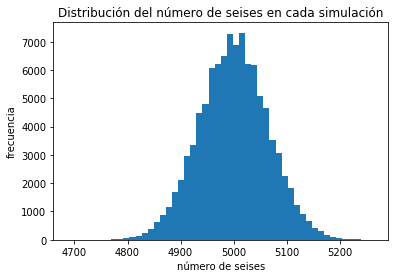

In [263]:
plt.hist(list_num_seises, bins=50)
plt.title("Distribución del número de seises en cada simulación")
plt.xlabel("número de seises")
plt.ylabel("frecuencia")
plt.show()

In [264]:
result_simulaciones = (np.array(list_num_seises)>k) + 0 # +0 para volverlo un vector de 0s y 1s

In [265]:
results_df = pd.DataFrame()

In [266]:
results_df["num_simulacion"] = np.arange(1, num_simulaciones+1)
results_df["num_seises"] = list_num_seises
results_df["mas_de_k"] = result_simulaciones
results_df["exitos_acum"] = result_simulaciones.cumsum()
results_df["estimacion_P(X>k)"] = results_df["exitos_acum"]/results_df["num_simulacion"]
results_df.tail()

,num_simulacion,num_seises,mas_de_k,exitos_acum,estimacion_P(X>k)
99995,99996,4949,0,77928,0.779311
99996,99997,4911,0,77928,0.779303
99997,99998,5058,1,77929,0.779306
99998,99999,5079,1,77930,0.779308
99999,100000,4992,1,77931,0.779310


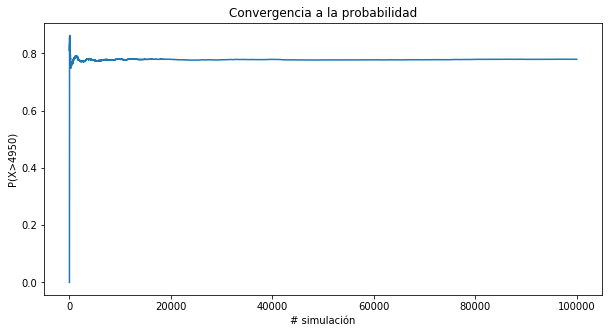

In [267]:
plt.figure(figsize=(10, 5))
plt.plot(results_df["estimacion_P(X>k)"])
plt.title("Convergencia a la probabilidad")
plt.xlabel("# simulación")
plt.ylabel(f"P(X>{k})")
plt.show()

In [268]:
prob_estimada_simul = sum(result_simulaciones)/len(result_simulaciones)
print(f"la probabilidad estimada por medio de {num_simulaciones} simulaciones es:")
print(f"P(X>{k}) = {prob_estimada_simul}")

la probabilidad estimada por medio de 100000 simulaciones es:
P(X>4950) = 0.77931
